In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

In [2]:
fraud_data = pd.read_csv('Fraud.csv')
fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
fraud_data.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [4]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
print (fraud_data[['isFraud']].value_counts(),
fraud_data[['isFlaggedFraud']].value_counts())

isFraud
0          6354407
1             8213
dtype: int64 isFlaggedFraud
0                 6362604
1                      16
dtype: int64


In [6]:
fraud_data.select_dtypes(include=['object'])

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703
...,...,...,...
6362615,CASH_OUT,C786484425,C776919290
6362616,TRANSFER,C1529008245,C1881841831
6362617,CASH_OUT,C1162922333,C1365125890
6362618,TRANSFER,C1685995037,C2080388513


In [7]:
fraud_data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
df1 = pd.get_dummies(data=fraud_data,columns=['type'])

In [9]:
df1.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [10]:
df1.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],inplace=True)

In [11]:
df1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   type_CASH_IN    uint8  
 8   type_CASH_OUT   uint8  
 9   type_DEBIT      uint8  
 10  type_PAYMENT    uint8  
 11  type_TRANSFER   uint8  
dtypes: float64(5), int64(2), uint8(5)
memory usage: 370.1 MB


In [13]:
df2 = df1.sample(frac=0.01, random_state=1)

In [15]:
df2.to_csv('df2.csv')

In [16]:
df2.shape

(63626, 12)

In [17]:
y = df2['isFraud']

In [18]:
X = df2.drop(columns=['isFraud'])

In [19]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
6322570,688,23557.12,8059.00,31616.12,169508.66,145951.53,1,0,0,0,0
3621196,274,6236.13,0.00,0.00,0.00,0.00,0,0,0,1,0
1226256,133,33981.87,18745.72,0.00,0.00,0.00,0,0,0,1,0
2803274,225,263006.42,20072.00,0.00,390253.56,653259.98,0,1,0,0,0
3201247,249,152013.74,20765.00,0.00,252719.19,404732.93,0,1,0,0,0


In [20]:
y

6322570    0
3621196    0
1226256    0
2803274    0
3201247    0
          ..
901302     0
6065993    0
27699      0
4705235    0
105139     0
Name: isFraud, Length: 63626, dtype: int64

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

/Users/zhuoli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/zhuoli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


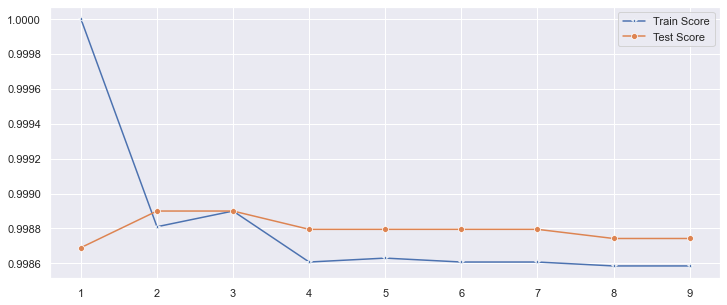

In [24]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

In [25]:
test_scores.index(max(test_scores))+1

2

In [26]:
from sklearn.metrics import confusion_matrix
knn2 = KNeighborsClassifier(3)
knn2.fit(X_train,y_train)
y_pred = knn2.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

In [27]:
print(pl)

[[19063     0]
 [   21     4]]


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19063
           1       1.00      0.16      0.28        25

    accuracy                           1.00     19088
   macro avg       1.00      0.58      0.64     19088
weighted avg       1.00      1.00      1.00     19088



In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [30]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.9991041405571937
Best Parameters: {'n_neighbors': 3}


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators':np.arange(1,50)}
rfc = RandomForestClassifier()
rfc_cv= GridSearchCV(rfc,param_grid,cv=5)
rfc_cv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [32]:
print("Best Score:" + str(rfc_cv.best_score_))
print("Best Parameters: " + str(rfc_cv.best_params_))

Best Score:0.9995599325298794
Best Parameters: {'n_estimators': 18}


In [33]:
rfc2=RandomForestClassifier(n_estimators=28)
rfc2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=28)

In [34]:
from sklearn.metrics import roc_curve
y_pred_proba = rfc2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

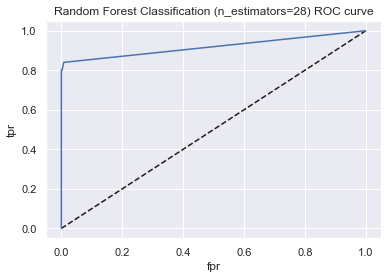

In [35]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='RFC')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest Classification (n_estimators=28) ROC curve')
plt.show()

In [36]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9191501862246235

In [37]:
confusion_matrix(y_test,rfc2.predict(X_test))

array([[19062,     1],
       [    7,    18]])